In [1]:
import numpy as np
import cv2
import importlib
import pandas as pd
import random
import pickle
import time
import matplotlib.pyplot as plt

import functions as fc
import moduleClass as mc

# module hyperparameters define

In [6]:
epochs = 50
batchs = 1000
lr = 0.01

module = mc.Perception()
lossf = mc.Lossfn()
opt = mc.Optimize(module, lossf, lr)
logger = fc.create_logger('./loggers/', 'logger.txt')

# for i in logger.handlers:
#     logger.removeHandler(i)
# logger.handlers = []

# load image features

In [17]:
with open('./features/train_datas.pickle', 'rb') as f:
    train_datas = pickle.load(f)
Xtrain, Ytrain = train_datas

with open('./features/val_datas.pickle', 'rb') as f:
    val_datas = pickle.load(f)
Xval, Yval = val_datas  

# train

In [8]:
# random sort traning image
N = Xtrain.shape[0]
trainIndex = [i for i in range(N)]
random.shuffle(trainIndex)

# load module parameters
with open('./modules/module.pickle', 'rb') as f:
    d = pickle.load(f)
module.load_model(d)

In [9]:
# accuracy log

train_accu1 = []
val_accu1 = []
train_accu5 = []
val_accu5 = []

# load module parameters
with open('./modules/module.pickle', 'rb') as f:
    d = pickle.load(f)
module.load_model(d)

In [13]:
module_save_path = './modules/module.pt'
accu_save_path = './modules/accu.pickle'

start = time.time()
logger.info('start at {}'.format(start))

for epoch in range(1, epochs+1):
    logger.info('Epoch {}/{}'.format(epoch, epochs))
    logger.info('-' * 10)
    
    for phase in ['train', 'val']:
        if phase == 'train':
            c = 0
            while c < N:
                try:
                    train_indexs = trainIndex[c:c + batchs]
                    inputs = Xtrain[train_indexs, :]
                    response = Ytrain[train_indexs]
                    outputs = module.forward(inputs)
                    loss = lossf.forward(outputs, response)
                    opt.zero_grad()
                    opt.backward()
                    opt.upgrade_w()
                    c += batchs
                except Exception as e:
                    logger.error(e, exc_info=True)
            outputs = module.forward(Xtrain)
            accu1 = fc.top_n_accuracy(outputs, Ytrain, n=1)
            accu5 = fc.top_n_accuracy(outputs, Ytrain, n=5)
            train_accu1.append(accu1)
            train_accu5.append(accu5)
            
        else:
            outputs = module.forward(Xval)
            accu1 = fc.top_n_accuracy(outputs, Yval, n=1)
            accu5 = fc.top_n_accuracy(outputs, Yval, n=5)
            val_accu1.append(accu1)
            val_accu5.append(accu5)
        
        logger.info('{} accuracy: {}, {}, {}/{}'.format(phase, accu1, accu5, epoch, epochs))
        
        accu_dict = {'train1':train_accu1, 'val1':val_accu1, 'train5':train_accu5, 'val5':val_accu5}
        with open(accu_save_path, 'wb') as f:
            pickle.dump(accu_dict, f)

    train_time = time.time() - start
    with open('./modules/module.pickle', 'wb') as f:
        pickle.dump(module.save_model(), f)
    logger.info('train time {}, {}/{}'.format(train_time, epoch, epochs))

2021-03-23 19:15:38,612 INFO start at 1616498138.6126199
2021-03-23 19:15:38,614 INFO Epoch 1/50
2021-03-23 19:15:38,615 INFO ----------


5.1201622941552865
5.126787972169958
5.095743013727758
5.066005368786204
5.1119067987016535
5.175254866300505
5.135306673656398
5.110443864082233
5.054817606323087
5.2285779311452885
5.024494961945122
5.157349155095368
5.1075362562560676
5.1750811965202
5.081565577970557
5.127399303690058
5.051143649858224
5.0877262110945445
5.196339241505489
5.1135143424948195
5.133395951457019
5.099317998342661
5.097612177891844
5.190911024855278
5.094681913393876
5.167513470436691
5.031715703250863
5.104101406293889
5.069840791754513
5.045845423141499
5.198476756323632
5.166270599797819
5.1486466501974935
5.125861447372764
5.123824224512624
5.099493050119849
5.086051323362698
5.143205033314021
5.148218685897325
5.155823455923458
5.193370183888994
5.190545680095537
5.076166248523173
5.106989266015399
5.160475155214444
5.182008881086743
5.201756693795466
5.049286485229922
5.1149919908214665
5.180981518131125
5.079055709273409
5.0936041309521745
5.1580886274844895
5.068123730365941
5.142990677538668
5.

2021-03-23 19:15:45,037 INFO train accuracy: 0.019913146466640348, 0.10059218318199763, 1/50
2021-03-23 19:15:45,079 INFO val accuracy: 0.024444444444444446, 0.1111111111111111, 1/50
2021-03-23 19:15:45,082 INFO train time 6.467997312545776, 1/50
2021-03-23 19:15:45,082 INFO Epoch 2/50
2021-03-23 19:15:45,083 INFO ----------


5.119600019148549
5.126314764976106
5.095361285959637
5.065015449245008
5.111297455622484
5.17532690281024
5.1340771400761795
5.110547383778612
5.054508453844308
5.22755084393966
5.023972943623553
5.15771633038542
5.106364911402961
5.17396459891838
5.082466146251332
5.12812273377369
5.050592817862262
5.086933384115233
5.196036783854957
5.111917923495652
5.133042900229779
5.098845234299313
5.096923572050791
5.1904127693899715
5.093477717676742
5.167101184430756
5.03119055704661
5.1047696455613565
5.068300824890273
5.044939674219342
5.197612502361644
5.1660894423342265
5.147578593211071
5.1252043284073325
5.12431864829181
5.099372972091982
5.085944056488002
5.142789326281001
5.1473183796899304
5.155838059551104
5.192857123587246
5.190218296100069
5.076064688322442
5.106923917352186
5.160824216332351
5.180713021794223
5.201605690123683
5.049225518193328
5.1139522343133095
5.181481902428634
5.079090935294804
5.093484759015117
5.157532194195582
5.068412078487186
5.141901201410968
5.11632707

2021-03-23 19:15:48,833 INFO train accuracy: 0.01994472956968022, 0.10067114093959731, 2/50
2021-03-23 19:15:48,877 INFO val accuracy: 0.024444444444444446, 0.10888888888888888, 2/50
2021-03-23 19:15:48,880 INFO train time 10.265970230102539, 2/50
2021-03-23 19:15:48,880 INFO Epoch 3/50
2021-03-23 19:15:48,881 INFO ----------


5.119262336002452
5.126055598078445
5.095200884932628
5.064247736499614
5.110914386738219
5.175624847608702
5.1330683562474695
5.110870920268399
5.0544195727639565
5.226740308875057
5.023666736737933
5.158308174144631
5.105405916678776
5.173065004925879
5.083583539987821
5.1290594021012375
5.0502627623471605
5.086363690626815
5.195955402418805
5.110547535446054
5.132910018264961
5.09859395565883
5.096455384649831
5.190131415833139
5.0925029838672
5.166908830841671
5.030882499860081
5.105654841755613
5.066976295346998
5.044253165639021
5.196967165409056
5.166124206472752
5.146726671512052
5.124763471143385
5.1250293743486655
5.099467658993794
5.0860532359305255
5.142589575457327
5.14664293796418
5.156074397010077
5.192559443287132
5.190110423463703
5.076183970794481
5.1070755177677105
5.161385107336867
5.179631554202361
5.201672043372426
5.049377433896491
5.113131369697206
5.182196973014303
5.079340930143335
5.093583439690986
5.157195882829224
5.068912422981599
5.141028629812785
5.11627

2021-03-23 19:15:52,445 INFO train accuracy: 0.019913146466640348, 0.10090801421239637, 3/50
2021-03-23 19:15:52,476 INFO val accuracy: 0.02666666666666667, 0.10888888888888888, 3/50
2021-03-23 19:15:52,480 INFO train time 13.865578174591064, 3/50
2021-03-23 19:15:52,480 INFO Epoch 4/50
2021-03-23 19:15:52,481 INFO ----------


5.119140480151762
5.126002266726699
5.095253116741263
5.063693765099487
5.1107489499127565
5.176139886312074
5.132271808295972
5.111406087908628
5.054542453905926
5.226138270527723
5.023568199534563
5.159116117114835
5.104651191080117
5.172374060417933
5.084909326697243
5.130201283847194
5.050144996498294
5.086008659977697
5.19608665937623
5.109394759819368
5.132988887969357
5.098555928781767
5.09619923512173
5.190058579328781
5.091748915883519
5.166928089593822
5.0307834240213705
5.106748761025112
5.065859014139852
5.04377744213528
5.1965325659736195
5.1663666944213755
5.1460827598716605
5.124530710677428
5.125948298614892
5.099769099848497
5.086370653995176
5.142597702165696
5.146183805661384
5.156524017810403
5.192468988499139
5.190213868921842
5.076515865712033
5.107435877940881
5.162150094546653
5.178756442620288
5.20194751941804
5.049734353540158
5.112521126286425
5.183118701699318
5.079797628267746
5.093891854161018
5.157071384607152
5.0696167120230795
5.140364755239725
5.116429

2021-03-23 19:15:57,184 INFO train accuracy: 0.019786814054480854, 0.10114488748519541, 4/50
2021-03-23 19:15:57,220 INFO val accuracy: 0.02666666666666667, 0.1111111111111111, 4/50
2021-03-23 19:15:57,223 INFO train time 18.60894250869751, 4/50
2021-03-23 19:15:57,239 INFO Epoch 5/50
2021-03-23 19:15:57,240 INFO ----------


5.119226332959239
5.126147182061326
5.095509944793807
5.063345688126966
5.110793130932467
5.176863862446605
5.131679614673803
5.112145120391789
5.054869218119107
5.225737259964466
5.023669793103106
5.160132205921961
5.104093264076075
5.171884031569342
5.0864357210469455
5.131540948415848
5.05023166290735
5.085860439622068
5.196422733876873
5.108451787360114
5.133271713316074
5.098723519740213
5.096147365966184
5.190186507577163
5.091207357934545
5.167151251669907
5.030885817874005
5.108043787983826
5.06494140074772
5.043504685032156
5.196301125347875
5.166809314273076
5.145639333209332
5.124498482808786
5.1270679134375445
5.100269875403497
5.086888712520251
5.1428062236369465
5.14593305113931
5.157179081630233
5.192578209994253
5.190521031589927
5.077052735297562
5.107997412193519
5.163112006100167
5.17808025362265
5.202424504417925
5.050288976019268
5.112113842544378
5.184239650292033
5.080453556282809
5.094402303419317
5.157151003259509
5.070517499692029
5.139901971806742
5.116776090

2021-03-23 19:16:03,245 INFO train accuracy: 0.01989735491512041, 0.10155546782471378, 5/50
2021-03-23 19:16:03,294 INFO val accuracy: 0.02666666666666667, 0.11333333333333333, 5/50
2021-03-23 19:16:03,303 INFO train time 24.68934917449951, 5/50
2021-03-23 19:16:03,306 INFO Epoch 6/50
2021-03-23 19:16:03,306 INFO ----------


5.119512367953345
5.126483319339824
5.095963933914785
5.063196225940261
5.111039491947275
5.177789222664186
5.131284473669513
5.113080819003722
5.055392563599347
5.22553034621137
5.023964530755697
5.1613490527159405
5.103725223652838
5.171587753367905
5.0881555292900575
5.133071509434972
5.050515480623444
5.085911744391367
5.196956371020097
5.107711367870963
5.133751267940569
5.099089644327225
5.096292590463773
5.190508027264555
5.0908707416779135
5.167571168017817
5.031182716237814
5.1095328735089005
5.064216432149547
5.043427658658098
5.196265814986726
5.16744502987926
5.145389416356041
5.124659773750453
5.12838125793597
5.100963108809797
5.087600371944316
5.143208203473386
5.145883315108444
5.158032308429953
5.1928801134675036
5.191024854243067
5.077787485486014
5.108753087746729
5.164264185426289
5.177596104868907
5.2030959522036095
5.0510345301117265
5.111902415728823
5.185552921917624
5.081301783881222
5.095107657004141
5.157427604137239
5.071607894812082
5.139633225174676
5.1173

2021-03-23 19:16:07,417 INFO train accuracy: 0.019913146466640348, 0.10166600868535333, 6/50
2021-03-23 19:16:07,436 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 6/50
2021-03-23 19:16:07,446 INFO train time 28.832277059555054, 6/50
2021-03-23 19:16:07,449 INFO Epoch 7/50
2021-03-23 19:16:07,449 INFO ----------


5.119991601921076
5.127004170868918
5.096608199527811
5.063238619553438
5.111481124489105
5.178908966798068
5.131079615595103
5.114206505591199
5.056105717977269
5.225511092135515
5.024445932063611
5.162759789365192
5.103540669178085
5.171478582680992
5.090062098811886
5.134786579342003
5.050989697037234
5.086155810283068
5.197680835397239
5.107166764546015
5.134420847939354
5.0996477226480526
5.096628245139061
5.191016495377815
5.090732038125202
5.168181203123902
5.031667655322038
5.111209487332785
5.063677596499549
5.04353966159332
5.1964201105599575
5.168267315224511
5.145326538400155
5.125008074428433
5.129881872849349
5.1018424208012565
5.088499104988235
5.143797206591418
5.146027764100947
5.159076933032858
5.193368213721355
5.191718779021934
5.078713521613816
5.109696378635065
5.1656004489728495
5.177297618653031
5.203955336513461
5.0519647310091145
5.111880256067594
5.187052116693762
5.082335879165685
5.096001306217352
5.157894567897859
5.072881514433778
5.139551967010246
5.1180

2021-03-23 19:16:11,025 INFO train accuracy: 0.019881563363600474, 0.10204500592183181, 7/50
2021-03-23 19:16:11,048 INFO val accuracy: 0.02666666666666667, 0.11555555555555555, 7/50
2021-03-23 19:16:11,051 INFO train time 32.437180519104004, 7/50
2021-03-23 19:16:11,052 INFO Epoch 8/50
2021-03-23 19:16:11,053 INFO ----------


5.120657550430429
5.1277037032251735
5.097436361478435
5.063466588240091
5.112111606675778
5.180216602353539
5.131058759247508
5.115515979819391
5.057002394753825
5.225673514342111
5.025107981125174
5.164358025792384
5.103533668643652
5.171550355491729
5.092149272331702
5.136680228145056
5.051648044169543
5.086586352374642
5.19858986880196
5.106811712442088
5.135274228958786
5.100391637879408
5.0971481465502935
5.1917057549729275
5.090784713880091
5.168975192834155
5.032334631697584
5.113067574994438
5.063318851025897
5.043834482330316
5.19675795025413
5.169270112903464
5.145444691205256
5.125537338957252
5.131563759477518
5.102901888962348
5.089578854542371
5.1445672582435735
5.146360048077707
5.160306663778541
5.194036492971705
5.192596707163211
5.079824708132101
5.110821223860135
5.167115047801616
5.177178879754506
5.204996607626424
5.053073740794157
5.112041245061646
5.188731291378751
5.083549868010675
5.097077121459488
5.158545748364958
5.074332441556451
5.139652113580921
5.118917

2021-03-23 19:16:16,230 INFO train accuracy: 0.019913146466640348, 0.102250296091591, 8/50
2021-03-23 19:16:16,260 INFO val accuracy: 0.024444444444444446, 0.11555555555555555, 8/50
2021-03-23 19:16:16,264 INFO train time 37.65058374404907, 8/50
2021-03-23 19:16:16,266 INFO Epoch 9/50
2021-03-23 19:16:16,270 INFO ----------


5.121504187384966
5.12857631837571
5.098442502083826
5.063874290976502
5.112924964234127
5.181706103051478
5.131216072267465
5.11700348032841
5.058076753692949
5.22601204671711
5.025945088669942
5.166137812069514
5.103698719877241
5.171797347944454
5.094411346335752
5.138746945972143
5.052484698964264
5.087197526495828
5.199677651738975
5.106640380708588
5.136305627188303
5.1013156988121935
5.097846552012218
5.192570094994978
5.091022691322208
5.16994740603468
5.033178064965237
5.115101518745989
5.063134583766605
5.044306358954975
5.197273696929546
5.170447796328542
5.1457382917183505
5.126241946908903
5.133421342343705
5.104136010704649
5.090833995377017
5.145512806749077
5.146874261805606
5.161715644882189
5.194879362906477
5.193652962382568
5.081115331972485
5.1121219893940335
5.168802632688193
5.177234397193181
5.206214152990167
5.054356132499766
5.112379697540061
5.190584922635192
5.084938197090855
5.098329413329226
5.159375434187673
5.075955186707056
5.139928008112392
5.119978668

2021-03-23 19:16:20,271 INFO train accuracy: 0.019976312672720094, 0.10245558626135018, 9/50
2021-03-23 19:16:20,296 INFO val accuracy: 0.024444444444444446, 0.11777777777777777, 9/50
2021-03-23 19:16:20,308 INFO train time 41.69433331489563, 9/50
2021-03-23 19:16:20,310 INFO Epoch 10/50
2021-03-23 19:16:20,312 INFO ----------


5.122525908240835
5.12961681833894
5.099621128024795
5.064456291369441
5.113915635000634
5.183371871068888
5.13154613504518
5.118663649426705
5.059323364808344
5.226521507274424
5.026952057635945
5.168093603919559
5.1040307153463615
5.172214240863096
5.096843033348688
5.140981609052147
5.053494247214832
5.087983894319031
5.200938768387247
5.106647338226016
5.137509663900307
5.1024146058225
5.0987181238886095
5.193604213776232
5.091440312376491
5.1710925098314195
5.034192763784251
5.117306102042691
5.0631195787858445
5.044949942483175
5.197962103768363
5.171795135325333
5.146202147715196
5.127116669021582
5.135449435236223
5.105539669602389
5.092259299322676
5.146628689589224
5.147564909663519
5.163298422159656
5.195891630155523
5.19488225756718
5.08258006922214
5.1135934336725795
5.170658222394833
5.1774590695198475
5.207602761467976
5.055806857413169
5.112890327120204
5.192607873578951
5.08649570023962
5.099752897159275
5.160378313954029
5.077744653021429
5.140374386563082
5.121204802

2021-03-23 19:16:24,281 INFO train accuracy: 0.020007895775759968, 0.10259771022502961, 10/50
2021-03-23 19:16:24,315 INFO val accuracy: 0.024444444444444446, 0.11555555555555555, 10/50
2021-03-23 19:16:24,320 INFO train time 45.70612049102783, 10/50
2021-03-23 19:16:24,324 INFO Epoch 11/50
2021-03-23 19:16:24,326 INFO ----------


5.123717496544832
5.130820373053878
5.100967135724114
5.065207525742018
5.1150784365838575
5.185208702644424
5.132043907848131
5.120491500988152
5.060737175609375
5.227197067994478
5.028124051887158
5.170220231301888
5.104524910209053
5.172796087430122
5.099439427681528
5.143379448800426
5.0546716507826
5.088940391553291
5.202368174699265
5.106827522330919
5.138881333206234
5.103683419944442
5.099757897119616
5.194803185868036
5.092032305535051
5.172405537898613
5.035373894952416
5.1196764772747505
5.063268984542576
5.045760263515586
5.198818283080214
5.173307264799559
5.146831426657783
5.128156636023382
5.1376432103127145
5.107108104767342
5.093849903595306
5.147910102553035
5.14842687356237
5.165049911804688
5.197068464856724
5.19627966446309
5.084213954794483
5.115230676246852
5.1726771748121445
5.177848153305595
5.20915759086009
5.057421215317387
5.113568214754731
5.194795363308888
5.088217567827869
5.101342660682787
5.161549444438059
5.079696104501941
5.140986346497158
5.122591176

2021-03-23 19:16:28,911 INFO train accuracy: 0.020086853533359653, 0.10277141729174892, 11/50
2021-03-23 19:16:28,928 INFO val accuracy: 0.024444444444444446, 0.11555555555555555, 11/50
2021-03-23 19:16:28,930 INFO train time 50.31679821014404, 11/50
2021-03-23 19:16:28,931 INFO Epoch 12/50
2021-03-23 19:16:28,932 INFO ----------


5.125074093479709
5.1321824911540626
5.102475779883652
5.06612327407852
5.116408536896525
5.187211756743092
5.132704700872641
5.122482391247096
5.062313481298559
5.228034227367946
5.02945656776749
5.172512869786321
5.105176893295887
5.173538283737738
5.10219597432457
5.145936023710346
5.056012217793201
5.090062298953155
5.2039611693439225
5.107176210333015
5.140415972724546
5.105117534745972
5.100961249677626
5.196162431890386
5.092793755825569
5.173881861692641
5.036716955253414
5.1222081364290055
5.063578285111362
5.046732701900115
5.199837677960233
5.1749796561867925
5.1476216273665285
5.1293573102737335
5.13999816997683
5.10883688297098
5.095601281968331
5.149352571644037
5.1494553836899915
5.166965371931114
5.198405372029395
5.1978405860702575
5.086012354807938
5.117029169289377
5.174855160692752
5.178397234520792
5.210874138384154
5.059194827388939
5.114408780073866
5.197142939138387
5.0900993188789085
5.1030941345480985
5.162884221687167
5.081805137151196
5.141759318763133
5.124

2021-03-23 19:16:32,929 INFO train accuracy: 0.02019739439399921, 0.10258191867350967, 12/50
2021-03-23 19:16:32,951 INFO val accuracy: 0.024444444444444446, 0.11777777777777777, 12/50
2021-03-23 19:16:32,954 INFO train time 54.34021329879761, 12/50
2021-03-23 19:16:32,955 INFO Epoch 13/50
2021-03-23 19:16:32,956 INFO ----------


5.126591170129886
5.133698993368032
5.104142644879747
5.067199133555231
5.117901427289821
5.189376526498583
5.1335241469452715
5.124631992212397
5.06404789763881
5.229028785383423
5.030945408215165
5.174967014447228
5.1059825607361935
5.17443654194617
5.105108440682113
5.148647193778604
5.057511575524458
5.091345215877503
5.20571336722439
5.107688993555993
5.142109236883142
5.106712650735584
5.102323875671533
5.197677691110272
5.093720077445902
5.175517164255093
5.03821774581169
5.124896884396318
5.064043273981491
5.047862959117505
5.201016036521587
5.17680809142044
5.148568554235635
5.130714459951771
5.142510121262841
5.110721873248621
5.097509218519464
5.150951927485065
5.1506459918161385
5.169040376616954
5.199898165490611
5.199560731483383
5.087970941411933
5.11898467167845
5.177188139725192
5.179102202522467
5.212748213827945
5.0611236114957885
5.115407755257079
5.199646451273318
5.092136775659561
5.105003065421479
5.164378354680747
5.0840676527076365
5.14268904171019
5.1258275044

2021-03-23 19:16:36,608 INFO train accuracy: 0.02019739439399921, 0.10269245953414922, 13/50
2021-03-23 19:16:36,639 INFO val accuracy: 0.024444444444444446, 0.11555555555555555, 13/50
2021-03-23 19:16:36,642 INFO train time 58.028170347213745, 13/50
2021-03-23 19:16:36,643 INFO Epoch 14/50
2021-03-23 19:16:36,646 INFO ----------


5.12826450220599
5.135365988293501
5.105963618743001
5.068430994409007
5.1195528980443985
5.1916988131746225
5.134498176624347
5.126936267446962
5.06593633623422
5.2301768207221055
5.0325866591870465
5.177578456034191
5.106938091968165
5.175486865805864
5.1081728908733375
5.151509097217488
5.0591656457249785
5.0927850361569975
5.2076206753262495
5.108361753657905
5.143957072601903
5.108464752052274
5.103841760844687
5.19934499648524
5.094806988809364
5.177307416353163
5.03987234871735
5.127738814666804
5.06466003018521
5.049147033130459
5.202349388450368
5.178788639178048
5.149668293744692
5.132224135544936
5.145175152486771
5.112759223744605
5.099569783704865
5.152704281981412
5.151994546916282
5.171270792211467
5.20154294407318
5.201436092941244
5.0900856698227965
5.121093225408526
5.179672338719799
5.179959226394435
5.214775915113759
5.063203759664006
5.116561161192474
5.202302029704046
5.094326040511126
5.107065491438871
5.166027841315134
5.086479834732866
5.143771537698174
5.12766

2021-03-23 19:16:40,572 INFO train accuracy: 0.02019739439399921, 0.10280300039478879, 14/50
2021-03-23 19:16:40,594 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 14/50
2021-03-23 19:16:40,610 INFO train time 61.996065616607666, 14/50
2021-03-23 19:16:40,611 INFO Epoch 15/50
2021-03-23 19:16:40,612 INFO ----------


5.130090146990439
5.137179850315353
5.107934869472549
5.069815017917933
5.121359015994654
5.194174702409882
5.135622995473709
5.129391449982198
5.067974981990735
5.231474669944506
5.034376668166271
5.1803432591983745
5.108039927897314
5.176685528321874
5.111385662349071
5.154518129230346
5.060970622126311
5.094377926050351
5.209679270673033
5.109190641010444
5.145955697125206
5.110370085214577
5.105511160235259
5.201160651933189
5.096050489768363
5.179248854729639
5.04167710570513
5.130730287179085
5.0654248965294935
5.050581195459996
5.203834023654272
5.180917633187885
5.150917193042841
5.133882648415059
5.147989611945452
5.114945340581117
5.101779312535758
5.154606007025041
5.153497172894589
5.173652755687882
5.203336069925727
5.203462924869327
5.092352757355019
5.123351134098608
5.182304231700354
5.180964733408603
5.216953606038197
5.065431717502705
5.117865285704595
5.205106063100088
5.09666347470492
5.109277719788664
5.167828946491643
5.089038126823421
5.14500309167925
5.129656310

2021-03-23 19:16:44,420 INFO train accuracy: 0.02010264508487959, 0.10303987366758784, 15/50
2021-03-23 19:16:44,461 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 15/50
2021-03-23 19:16:44,465 INFO train time 65.8509840965271, 15/50
2021-03-23 19:16:44,465 INFO Epoch 16/50
2021-03-23 19:16:44,466 INFO ----------


5.132064422288863
5.139137199459332
5.11005282345852
5.071347616290151
5.123316104082645
5.19680054253107
5.1368950633021715
5.1319940221594385
5.07016027254575
5.232918908475235
5.036312024548846
5.1832577425756465
5.109284750990679
5.1780290513579885
5.114743344597704
5.157670922648161
5.06292294993434
5.096120304090015
5.211885580186679
5.1101720549368315
5.14810157779491
5.112425139726065
5.1073285777896755
5.203121211611201
5.09744684080586
5.181337962256
5.043628598690328
5.133867908112778
5.06633445972693
5.052161970274365
5.205466472798483
5.183191652398145
5.1523118404030965
5.135686551239494
5.150950088465132
5.117276868553512
5.10413438465431
5.15665371504291
5.155150248207002
5.17618265484513
5.205274148695645
5.2056377247217895
5.0947686642538805
5.125754943392227
5.185080521715161
5.1821153893980565
5.2192778959741775
5.0678041653978365
5.119316663652144
5.208055179516026
5.099145679127902
5.111636306226021
5.169778182105854
5.091739212741166
5.146380231650069
5.131784261

2021-03-23 19:16:49,414 INFO train accuracy: 0.020118436636399527, 0.10321358073430714, 16/50
2021-03-23 19:16:49,441 INFO val accuracy: 0.02666666666666667, 0.11555555555555555, 16/50
2021-03-23 19:16:49,457 INFO train time 70.84294843673706, 16/50
2021-03-23 19:16:49,463 INFO Epoch 17/50
2021-03-23 19:16:49,467 INFO ----------


5.134183887192593
5.141234882993107
5.112314145807608
5.073025434276193
5.125420722657023
5.199572924739338
5.138311075181243
5.134740697209975
5.072488879475372
5.234506333210366
5.038389541724705
5.186318460546358
5.110669467115104
5.179514186997075
5.118242759735588
5.160964330245217
5.0650193071061
5.098008822636676
5.21423626227005
5.111302625628317
5.150391413574935
5.114626630354296
5.109290747739559
5.205223461007702
5.098992544003952
5.183571449802096
5.045723631984071
5.1371485114335655
5.067385532241091
5.053886115296407
5.207243489542637
5.185607502830608
5.153849047363882
5.1376326201452045
5.154053393620633
5.1197506734750915
5.106631806124785
5.158844241211781
5.156950387203636
5.178857110180858
5.207354011414456
5.207957215447068
5.097330076154616
5.128301423062911
5.1879981241997735
5.183408080852972
5.221745621342622
5.070318001303591
5.120912058716327
5.211146228735228
5.101769476621997
5.114138036337915
5.171872288754775
5.094579998275669
5.147899710792529
5.1340504

2021-03-23 19:16:53,654 INFO train accuracy: 0.020023687327279906, 0.10319778918278721, 17/50
2021-03-23 19:16:53,700 INFO val accuracy: 0.02666666666666667, 0.11555555555555555, 17/50
2021-03-23 19:16:53,709 INFO train time 75.09503769874573, 17/50
2021-03-23 19:16:53,715 INFO Epoch 18/50
2021-03-23 19:16:53,719 INFO ----------


5.136445324476712
5.143469958605036
5.114715722386151
5.074845332338282
5.127669652349997
5.202488664992455
5.139867944071629
5.137628402404502
5.074957691106758
5.236233946589671
5.040606240687521
5.189522186510532
5.112191188947383
5.181137900491005
5.121880944797103
5.164395408569383
5.06725658723706
5.100040350979149
5.216728189945937
5.112579197576705
5.152822118156224
5.116971480918829
5.111394617571647
5.207464399670921
5.100684325617882
5.185946239654868
5.047959216026046
5.140569142019617
5.068575135680412
5.055750604353809
5.209162034310763
5.188162200957621
5.155525832393368
5.139717838371125
5.157296545463552
5.122363826011753
5.10926859277413
5.161174627178892
5.158894423027805
5.181672958275323
5.2095726979220895
5.210418329420134
5.100033888010452
5.130987550657105
5.191054151740418
5.1848398985694715
5.224353828680448
5.072970324977456
5.122648446717965
5.214376266095048
5.104531895818018
5.116779908394401
5.1741082189967615
5.097557594670591
5.149558491138604
5.1364520

2021-03-23 19:16:58,006 INFO train accuracy: 0.020086853533359653, 0.10321358073430714, 18/50
2021-03-23 19:16:58,102 INFO val accuracy: 0.024444444444444446, 0.11333333333333333, 18/50
2021-03-23 19:16:58,109 INFO train time 79.49491095542908, 18/50
2021-03-23 19:16:58,110 INFO Epoch 19/50
2021-03-23 19:16:58,111 INFO ----------


5.1388457244752805
5.145839679007603
5.117254643413842
5.0768043712268085
5.130059878381043
5.205544787422472
5.141562784905522
5.140654263619089
5.077563796780329
5.238098941991928
5.042959335024173
5.1928658975323065
5.113847220801368
5.182897354649234
5.125655135558252
5.167961403139833
5.069631883901809
5.102211959832507
5.219358435403252
5.113998814376447
5.155390804488502
5.119456809439831
5.113637332436488
5.209841225414186
5.102519120100417
5.1884594503344585
5.050332552488968
5.14412704021511
5.0699004855902805
5.057752611413613
5.211219259443574
5.190852958457237
5.157339405928433
5.141939381310938
5.1606767536137745
5.125113586862514
5.112041954932781
5.163642106143811
5.160979391924146
5.184627236541547
5.211927441682906
5.213018193698906
5.102877189347954
5.133810496524
5.1942459001021986
5.186408122698196
5.227099759149112
5.075758423520182
5.12452300031756
5.217742537652237
5.107430156320824
5.119559117637112
5.1764831220148215
5.100669303462392
5.151353728611368
5.13898

2021-03-23 19:17:01,861 INFO train accuracy: 0.02005527043031978, 0.10338728780102645, 19/50
2021-03-23 19:17:01,897 INFO val accuracy: 0.022222222222222223, 0.11555555555555555, 19/50
2021-03-23 19:17:01,900 INFO train time 83.28642535209656, 19/50
2021-03-23 19:17:01,901 INFO Epoch 20/50
2021-03-23 19:17:01,903 INFO ----------


5.141382270291488
5.148341477827561
5.119928188457103
5.078899797828638
5.132588576151283
5.208738509143743
5.143392899986531
5.1438155911808146
5.080304472421821
5.240098690325396
5.045446217150076
5.196346760223574
5.115635044733237
5.1847898955298115
5.129562751744005
5.171659734879227
5.072142476306436
5.104520907101591
5.222124255816118
5.115558704765561
5.158094770600037
5.122079914514533
5.116016220857583
5.212351319854634
5.104494055437145
5.191108382672272
5.05284102062316
5.147819627672305
5.071358977509156
5.059889495958298
5.2134124955970815
5.1936771682159355
5.1592871566549965
5.144294602802784
5.164191405583453
5.127997393157397
5.114949283440991
5.166244089171494
5.163202518823114
5.187717169212085
5.214415655860318
5.215754116477928
5.105857250722277
5.136767610096412
5.197570835400335
5.18811020905542
5.229980834343486
5.078679758096059
5.126533074967221
5.221242466561395
5.110461655116513
5.122473041870542
5.178994329549002
5.1039126025947645
5.153282759308772
5.1416

2021-03-23 19:17:05,421 INFO train accuracy: 0.02019739439399921, 0.1035767864192657, 20/50
2021-03-23 19:17:05,446 INFO val accuracy: 0.022222222222222223, 0.11555555555555555, 20/50
2021-03-23 19:17:05,448 INFO train time 86.8347053527832, 20/50
2021-03-23 19:17:05,449 INFO Epoch 21/50
2021-03-23 19:17:05,450 INFO ----------


5.144052324214804
5.150972956659394
5.122733812686837
5.081129032165907
5.135253098005703
5.212067226320386
5.145355765583021
5.147109866869791
5.083177167298343
5.242230727699268
5.048064445670155
5.199962117748829
5.117552307800167
5.186813039309551
5.1336013834849386
5.175487987661467
5.074785816125672
5.106964624790241
5.225023080314698
5.117256269786732
5.160931486581038
5.12483826280215
5.118528781616046
5.214992235156461
5.106606439667527
5.19389050702865
5.055482164722455
5.151644494358049
5.072948174167283
5.062158789575034
5.215739239266137
5.196632391461371
5.161366638910369
5.146781022546312
5.167838054215668
5.131012845956545
5.117988136800038
5.168978152619166
5.165561204082449
5.190940154444972
5.217034920530528
5.218623574624817
5.108971511257927
5.139856407301396
5.2010265823049595
5.189943776573154
5.23299464327534
5.0817319517217525
5.128676195996167
5.224873640552266
5.113623954085297
5.12551922823402
5.1816393429768
5.107285133686206
5.155343086910242
5.14444337595

2021-03-23 19:17:09,144 INFO train accuracy: 0.02024476904855902, 0.10365574417686538, 21/50
2021-03-23 19:17:09,164 INFO val accuracy: 0.022222222222222223, 0.12, 21/50
2021-03-23 19:17:09,173 INFO train time 90.55961418151855, 21/50
2021-03-23 19:17:09,176 INFO Epoch 22/50
2021-03-23 19:17:09,176 INFO ----------


5.146853415230324
5.153731873170621
5.125669134278407
5.0834896554361
5.138050961052673
5.21552850137476
5.147449019602475
5.150534731967129
5.086179491845954
5.24449274407318
5.050811733757941
5.2037094778463135
5.1195968103611165
5.18896446022253
5.137768778902531
5.179443896868412
5.077559515410679
5.109540706948793
5.22805249799929
5.119089070962976
5.1638985826187325
5.127729477510129
5.121172671699279
5.2177616818626635
5.10885374847892
5.196803451540737
5.058253682604841
5.155599386612825
5.074665793719503
5.064558183642257
5.218197141323334
5.199716345919369
5.163575561100216
5.149396314539392
5.171614406131876
5.1341576987464865
5.121156229359574
5.171842026572196
5.168053011277612
5.194293752444406
5.219782970927343
5.221624202196872
5.1122175671725305
5.143074558991328
5.204610913181292
5.1919065957778985
5.236138930418711
5.08491277802284
5.130950046723737
5.228633800402686
5.116914768515748
5.128695381044723
5.184415821432795
5.110784690340214
5.157532371098452
5.147361664

2021-03-23 19:17:13,074 INFO train accuracy: 0.020307935254638768, 0.10378207658902487, 22/50
2021-03-23 19:17:13,086 INFO val accuracy: 0.022222222222222223, 0.12, 22/50
2021-03-23 19:17:13,097 INFO train time 94.48290228843689, 22/50
2021-03-23 19:17:13,097 INFO Epoch 23/50
2021-03-23 19:17:13,098 INFO ----------


5.149783227516974
5.156616130159216
5.128731922844548
5.085979398995517
5.140979835941557
5.2191200512306315
5.149670450246482
5.154087976249728
5.08930920646672
5.24688257279274
5.053685938456179
5.207586501770771
5.121766495319383
5.1912419794666596
5.142062832714696
5.18352533885942
5.080461335465242
5.112246898562995
5.23121024689966
5.121054819393068
5.1669938379840215
5.130751327786152
5.123945695212568
5.220657517711618
5.111233613772821
5.199844991302515
5.061153415011274
5.159682196162711
5.076509698914495
5.067085518009903
5.220783996475431
5.2029268949004015
5.165911775034054
5.152138296437905
5.175518311093391
5.137429846840497
5.124451420443704
5.174833584193683
5.170675655944659
5.197775674501333
5.222657686621384
5.224753779846085
5.115593161191314
5.146419880297806
5.208321738076956
5.1939965781987665
5.239411584716101
5.088220150868161
5.133352457504639
5.2325208293147885
5.120331956526298
5.13199935061269
5.187321570869745
5.114409207399296
5.159848416899529
5.1504037

2021-03-23 19:17:26,964 INFO train accuracy: 0.02043426766679826, 0.10395578365574418, 23/50
2021-03-23 19:17:27,115 INFO val accuracy: 0.022222222222222223, 0.12, 23/50
2021-03-23 19:17:27,121 INFO train time 108.50757646560669, 23/50
2021-03-23 19:17:27,129 INFO Epoch 24/50
2021-03-23 19:17:27,130 INFO ----------


5.152839589842449
5.15962376547352
5.1319200888027305
5.088596134197806
5.144037536509095
5.222839736494717
5.152017985555467
5.157767527843074
5.092564211204878
5.249398180928466
5.056685050812423
5.211590994073047
5.124059438217747
5.1936435549882045
5.146481575764351
5.187730321268061
5.083489176598628
5.115081085297564
5.234494203792201
5.1231513656811725
5.170215170879361
5.133901718929633
5.126845793163717
5.223677737344937
5.113743813112458
5.2030130383887565
5.064179335836937
5.1638909499943395
5.078477887112876
5.069738770579723
5.223497733549619
5.206262037229909
5.168373266093025
5.15500491975182
5.179547752191349
5.140827317599167
5.127871704328164
5.177950831903682
5.17342699518824
5.201383772869634
5.225657081546488
5.228010225030015
5.119096172769825
5.149890320820782
5.21215709547799
5.196211766616374
5.242810629454345
5.091652114800846
5.1358813956203555
5.236532743111489
5.123873509309899
5.135429122938268
5.190354533973331
5.118156751053596
5.162289164855041
5.153567

2021-03-23 19:17:37,834 INFO train accuracy: 0.02056060007895776, 0.10398736675878405, 24/50
2021-03-23 19:17:37,971 INFO val accuracy: 0.022222222222222223, 0.12, 24/50
2021-03-23 19:17:37,974 INFO train time 119.35982203483582, 24/50
2021-03-23 19:17:37,978 INFO Epoch 25/50
2021-03-23 19:17:37,979 INFO ----------


5.156020465771612
5.162752942714472
5.135231673588906
5.091337863008741
5.147222010214395
5.226685551490257
5.1544896837614385
5.161571443852267
5.095942536220168
5.252037660344189
5.059807186772129
5.215720893140571
5.126473838105831
5.196167272063284
5.151023165383813
5.192056974049094
5.0866410686730665
5.118041284016137
5.237902374795826
5.125376690624473
5.173560629067845
5.137178683346356
5.129871034039498
5.226820462823092
5.116382259970653
5.206305632644187
5.067329543116684
5.168223801012653
5.080568481075655
5.072516047702193
5.226336406530714
5.209719897946038
5.170958144152604
5.15799426079951
5.183700836788854
5.144348261396035
5.131415200990159
5.181191900311024
5.176305018076511
5.205116031401747
5.228779294795191
5.231391582954762
5.122724609050813
5.153483955574648
5.2161151437622735
5.198550326072817
5.246334212929473
5.095206836193298
5.138534955940121
5.240667681178235
5.127537542125805
5.138982810211772
5.193512780851425
5.122025509724544
5.164852681947723
5.156851

2021-03-23 19:17:52,971 INFO train accuracy: 0.020592183181997632, 0.10395578365574418, 25/50
2021-03-23 19:17:53,079 INFO val accuracy: 0.022222222222222223, 0.12, 25/50
2021-03-23 19:17:53,107 INFO train time 134.49370169639587, 25/50
2021-03-23 19:17:53,116 INFO Epoch 26/50
2021-03-23 19:17:53,119 INFO ----------


5.159323944614086
5.166001942647768
5.13866484063811
5.094202709326256
5.150531329290478
5.230655615064452
5.1570837243757754
5.1654979017000695
5.099442332985195
5.254799219428299
5.063050578759588
5.219974262430393
5.129008009108096
5.198811334603085
5.155685876516996
5.196503541206506
5.089915162371985
5.121125634007738
5.2414328866762485
5.127728896590169
5.1770283812104765
5.140580372176878
5.133019605101189
5.230083934873703
5.11914699470488
5.209720933167104
5.0706022506955755
5.172679019409238
5.082779720452363
5.0754155753143495
5.229298186279128
5.213298719695632
5.1736646351910425
5.161104512350779
5.1879757881465185
5.147990943260984
5.135080147560055
5.184555035829529
5.179307836752336
5.208970556875469
5.232022582112763
5.23489601818363
5.126476596488634
5.157198976620876
5.220194153287047
5.201010535571662
5.249980599827319
5.098882595061012
5.141311352281782
5.244923898083266
5.1313222859706515
5.142658642042706
5.196794500427374
5.12601378565194
5.167537153211432
5.160

2021-03-23 19:18:04,708 INFO train accuracy: 0.020576391630477694, 0.10401894986182393, 26/50
2021-03-23 19:18:04,835 INFO val accuracy: 0.022222222222222223, 0.12, 26/50
2021-03-23 19:18:04,862 INFO train time 146.24793601036072, 26/50
2021-03-23 19:18:04,869 INFO Epoch 27/50
2021-03-23 19:18:04,870 INFO ----------


5.162748233044402
5.1693691552616485
5.142217867061302
5.097188910941854
5.153963682547983
5.234748162099875
5.159798399945732
5.169545191107813
5.10306186614129
5.257681175428809
5.066413567884649
5.224349282333582
5.131660372628064
5.201574057117198
5.1604680935289835
5.2010683731408145
5.093309721123249
5.124332388856171
5.245083978794734
5.13020619952035
5.1806167088475155
5.144105047537659
5.13628980433389
5.233466504805264
5.122036176194256
5.213257210424131
5.073995780521625
5.177254984676816
5.085109953905854
5.078435690751269
5.232381352866257
5.216996854766727
5.176491073521257
5.164333975895377
5.192370937669765
5.151753735140759
5.1388648904119085
5.188038592917042
5.182433678197654
5.212945570950726
5.235385308026904
5.238521806852394
5.130350373081685
5.1610336853244085
5.224392499053702
5.203590780404229
5.253748163254474
5.102677777476418
5.1442089094105965
5.2492997558157715
5.13522607986756
5.1464549573532485
5.200197992473417
5.130119987119903
5.170340873962542
5.163

2021-03-23 19:18:16,423 INFO train accuracy: 0.02054480852743782, 0.10431898934070273, 27/50
2021-03-23 19:18:16,480 INFO val accuracy: 0.022222222222222223, 0.12222222222222222, 27/50
2021-03-23 19:18:16,497 INFO train time 157.8818073272705, 27/50
2021-03-23 19:18:16,500 INFO Epoch 28/50
2021-03-23 19:18:16,502 INFO ----------


5.166291647334439
5.172853072411982
5.14588913595403
5.1002948120864575
5.15751736777272
5.238961535666202
5.162632108420594
5.173711706661672
5.106799505953624
5.260681947338319
5.069894596719056
5.228844242616037
5.134429450131112
5.204453857275984
5.16536830264037
5.205749919560178
5.096823113617986
5.127659908896417
5.248853995644569
5.13280692150945
5.184323998965508
5.147751075319353
5.1396800329910555
5.236966627025725
5.1250480740796345
5.216912838939315
5.077508555504656
5.181950178211751
5.0875576318165505
5.081574835170326
5.235584288470903
5.2208127577016095
5.17943589459066
5.167681054480971
5.196884717722498
5.1556351087222945
5.142767877835796
5.191641026881928
5.185680876593757
5.217039402701053
5.238865938556104
5.242267329437549
5.134344281159169
5.164986485177474
5.228708653898537
5.206289545044773
5.257635377361233
5.106590868530277
5.147226055619896
5.25379371658786
5.139247363718547
5.150370196877366
5.203721660227129
5.13434262126447
5.173262242596829
5.167408185

2021-03-23 19:18:29,565 INFO train accuracy: 0.020702724042637188, 0.10458744571654165, 28/50
2021-03-23 19:18:29,688 INFO val accuracy: 0.022222222222222223, 0.12222222222222222, 28/50
2021-03-23 19:18:29,703 INFO train time 171.08955216407776, 28/50
2021-03-23 19:18:29,709 INFO Epoch 29/50
2021-03-23 19:18:29,710 INFO ----------


5.169952606144831
5.176452281002675
5.149677129280308
5.103518856509086
5.1611907846651395
5.243294179755776
5.165583346073786
5.177995940912977
5.110653721313029
5.26380004928135
5.073492202592303
5.233457535386044
5.137313856454471
5.207449249018599
5.170385084929741
5.210546722905363
5.100453806872071
5.131106654206394
5.252741379923917
5.135529483904822
5.188148737097901
5.151516918493054
5.143188788681447
5.240582852112014
5.128181061554289
5.220686290506733
5.081139092891064
5.186763176452773
5.0901212995155705
5.0848315465337715
5.238905470786113
5.224744978440462
5.18249762829868
5.171144246069651
5.201515654957496
5.159633628770019
5.146787653240689
5.195360887207166
5.189047866226246
5.221250481670626
5.242463034445972
5.246131064030046
5.138456760674092
5.169055875140215
5.233141182163557
5.209105406563739
5.2616408105038
5.110620445793124
5.1503613158431385
5.258404336151571
5.143384671670636
5.154402896212202
5.207364003539617
5.138680287410527
5.176299753901395
5.17115700

2021-03-23 19:18:40,623 INFO train accuracy: 0.020829056454796685, 0.10471377812870114, 29/50
2021-03-23 19:18:40,753 INFO val accuracy: 0.022222222222222223, 0.12222222222222222, 29/50
2021-03-23 19:18:40,760 INFO train time 182.14585089683533, 29/50
2021-03-23 19:18:40,768 INFO Epoch 30/50
2021-03-23 19:18:40,771 INFO ----------


5.173729623826564
5.180165456654688
5.153580421279704
5.1068595810421735
5.164982428274752
5.24774463255112
5.168650700933074
5.182396477965979
5.114623073236707
5.267034084360871
5.077205011362074
5.238187648544486
5.140312293597667
5.210558836159081
5.175517109853646
5.215457412243772
5.10420035978271
5.134671178088713
5.256744666098971
5.138372400885572
5.192089500912782
5.155401130880148
5.146814658951173
5.244313820381683
5.131433608657668
5.22457612788078
5.0848859981089305
5.191692644508977
5.092799591000294
5.08820445310041
5.242343466890845
5.228792155950297
5.185674892787107
5.174722137367786
5.206262364118746
5.163747946932972
5.150922848842186
5.19919681134746
5.192533174888594
5.225577331411871
5.246175244887263
5.250111580071216
5.142686342959344
5.1732404434529675
5.237688733806452
5.21203702851296
5.265763118898287
5.114765173234199
5.153613305252184
5.263130257586815
5.147636625951453
5.158551679374346
5.211123612509244
5.143131670891891
5.179451992836478
5.17501859462

2021-03-23 19:18:53,268 INFO train accuracy: 0.020876431109356493, 0.10463482037110146, 30/50
2021-03-23 19:18:53,359 INFO val accuracy: 0.022222222222222223, 0.12222222222222222, 30/50
2021-03-23 19:18:53,366 INFO train time 194.7520351409912, 30/50
2021-03-23 19:18:53,369 INFO Epoch 31/50
2021-03-23 19:18:53,369 INFO ----------


5.177621304189608
5.183991357821419
5.1575976723517805
5.110315609612094
5.16889088288742
5.252311520178667
5.171832846675429
5.18691198751177
5.1187062088251425
5.270382738925325
5.081031731618568
5.243033159677321
5.143423544952277
5.213781306446933
5.180763129238458
5.22048069759265
5.108061417137023
5.138352121001009
5.260862474415725
5.1413342734797185
5.196144954245565
5.1594023513461496
5.150556315318486
5.24815825592287
5.13480427602987
5.228580998903279
5.088747959043146
5.196737330235258
5.095591223091709
5.091692267382596
5.2458969275460205
5.232953012298597
5.18896638866303
5.178413398087922
5.211123542275453
5.16797679598257
5.155172179793591
5.203147518959087
5.196135417742328
5.230018563463885
5.250001301674831
5.254207532512505
5.147031644907829
5.177538861879291
5.242350038911916
5.215083155241625
5.270001040724553
5.119023795559527
5.156980723300712
5.267970205520982
5.152001931134319
5.162815252817579
5.214999161559336
5.1476955373125435
5.1827176287467465
5.17899176

2021-03-23 19:19:07,772 INFO train accuracy: 0.020813264903276747, 0.10480852743782076, 31/50
2021-03-23 19:19:07,799 INFO val accuracy: 0.022222222222222223, 0.12222222222222222, 31/50
2021-03-23 19:19:07,806 INFO train time 209.19188690185547, 31/50
2021-03-23 19:19:07,815 INFO Epoch 32/50
2021-03-23 19:19:07,816 INFO ----------


5.1816263346994
5.187928820312742
5.161727623376121
5.113885647657511
5.1729148163276095
5.256993550906434
5.175128536947428
5.1915412192707
5.122901855636939
5.273844777221428
5.084971149286362
5.247992730354498
5.146646469933175
5.217115426043862
5.186121971703338
5.225615364634638
5.112035704034705
5.142148204897602
5.265093505323484
5.144413783983522
5.2003138415390975
5.163519298382699
5.154412507722591
5.252114961043488
5.138291709088357
5.232699631030453
5.092723740703631
5.201896058717464
5.098494989995834
5.09529378052853
5.249564581878349
5.237226347134833
5.1923708936178485
5.182216775606215
5.216097963451764
5.172318984444881
5.159534438723086
5.207211806526028
5.199853291596521
5.234572871735415
5.253940013769906
5.2584176563641005
5.151491363541659
5.181949880343523
5.247123902571757
5.218242606606148
5.274353390641208
5.123395132934445
5.160462348176103
5.272922980744286
5.156479368796781
5.167192399873482
5.218989403922684
5.152370727211263
5.186095409965501
5.183075368

2021-03-23 19:19:20,904 INFO train accuracy: 0.020986971969996052, 0.10484011054086063, 32/50
2021-03-23 19:19:20,946 INFO val accuracy: 0.022222222222222223, 0.12, 32/50
2021-03-23 19:19:20,952 INFO train time 222.33796977996826, 32/50
2021-03-23 19:19:20,954 INFO Epoch 33/50
2021-03-23 19:19:20,954 INFO ----------


5.185743481065857
5.191976752193612
5.165969090430745
5.117568476921558
5.177052974641477
5.261789509748336
5.178536600076144
5.196282997809573
5.127208816446698
5.277419036401313
5.089022122591002
5.253065100802585
5.14997999897791
5.220560034381318
5.19159253747725
5.230860269793876
5.116122020689631
5.14605822794905
5.269436534275847
5.14760969075026
5.20459498265727
5.167750765046003
5.158382059352372
5.2561828111041855
5.141894632592584
5.236930826226747
5.096812180254089
5.2071677271329815
5.101509758236002
5.09900785709426
5.253345232419112
5.241611032546789
5.195887257409814
5.186131089982146
5.221184473619179
5.1767733915956
5.164008490643477
5.211388542349827
5.20368556957248
5.239239027259719
5.257990262232542
5.262740761601171
5.1560642709388524
5.186472321929603
5.252009200103049
5.221514273040635
5.278819054677624
5.1278780760595
5.164057031626251
5.277987455188818
5.16106779254016
5.171681975579614
5.223093166498791
5.157156151095968
5.1895841587790565
5.187268358320445


2021-03-23 19:19:33,547 INFO train accuracy: 0.021129095933675485, 0.10501381760757994, 33/50
2021-03-23 19:19:33,572 INFO val accuracy: 0.022222222222222223, 0.12, 33/50
2021-03-23 19:19:33,590 INFO train time 234.9765820503235, 33/50
2021-03-23 19:19:33,594 INFO Epoch 34/50
2021-03-23 19:19:33,595 INFO ----------


5.189971582193222
5.196134129026464
5.17032095987508
5.121362950587885
5.181304177129949
5.266698253440939
5.182055934138244
5.201136217703579
5.131625964354864
5.281104421855583
5.093183577360725
5.2582490849219194
5.153423128883743
5.22411403936739
5.197173793577036
5.236214335642541
5.120319237579761
5.150081059609462
5.273890406879218
5.150920823319183
5.208987268041627
5.17209561422261
5.162463861823641
5.260360749703048
5.145611845565337
5.24127345619542
5.101012182371527
5.21255129995649
5.104634461925835
5.102833430173166
5.257237750468519
5.246106008261662
5.199514397180462
5.190155229310576
5.22638198602267
5.181338962788583
5.168593268204242
5.215676661873643
5.207631096123045
5.244015873291874
5.262150995493825
5.2671757283992795
5.1607492094890715
5.191105078212077
5.257004872577517
5.224897110958076
5.283396985472069
5.132471581571391
5.167763694131548
5.283162567242066
5.1657661233409025
5.176282901863552
5.227309345053961
5.162050784816973
5.193182766721907
5.1915697315

2021-03-23 19:19:46,389 INFO train accuracy: 0.02130280300039479, 0.10528227398341887, 34/50
2021-03-23 19:19:46,490 INFO val accuracy: 0.022222222222222223, 0.11777777777777777, 34/50
2021-03-23 19:19:46,517 INFO train time 247.90303254127502, 34/50
2021-03-23 19:19:46,523 INFO Epoch 35/50
2021-03-23 19:19:46,523 INFO ----------


5.19430954546202
5.200399989429743
5.174782183767277
5.125267988732928
5.185667311704027
5.271718705761871
5.185685502359213
5.206099839014916
5.136152238221402
5.284899902847279
5.09745450263645
5.263543565621405
5.156974918455176
5.227776412914534
5.202864769316559
5.241676546611739
5.124626290916891
5.1542156360038085
5.278454034361113
5.154346077857921
5.213489654183444
5.176552774196868
5.166656870676997
5.264647784183651
5.1494422165427665
5.2457264579193215
5.10532271490982
5.21804580448294
5.107868098355477
5.106769496853691
5.2612410717593106
5.2507102771649
5.2032512930784
5.194288145379313
5.231689476813618
5.186014705091497
5.173287767258383
5.220075163313684
5.211688782378645
5.248902320721938
5.266421224940752
5.271721502673749
5.165545087452552
5.195847104892129
5.262109922637598
5.228390138455368
5.288086197827802
5.137174667743513
5.171581320394428
5.288447317368792
5.170573345207183
5.1809941630542635
5.2316368997365155
5.1670536652517285
5.196890190176048
5.195978550

2021-03-23 19:19:58,409 INFO train accuracy: 0.021476510067114093, 0.1054243979470983, 35/50
2021-03-23 19:19:58,474 INFO val accuracy: 0.022222222222222223, 0.11777777777777777, 35/50
2021-03-23 19:19:58,492 INFO train time 259.8778681755066, 35/50
2021-03-23 19:19:58,505 INFO Epoch 36/50
2021-03-23 19:19:58,505 INFO ----------


5.198756342317261
5.2047734309275695
5.179351775588497
5.129282574069546
5.190141330537211
5.276849853162178
5.189424328815785
5.211172883064
5.140786638397621
5.288804508422921
5.101833946566151
5.268947490447124
5.1606344844371
5.231546186762518
5.208664552119821
5.247245944982728
5.129042178411165
5.158460955611057
5.283126389333523
5.157884412894454
5.218101159386618
5.181121234496399
5.17096010117073
5.269042981440215
5.153384679127705
5.250288829487312
5.10974280484331
5.223650326642767
5.111209723866497
5.1108151139792275
5.2653541923955185
5.255422901112147
5.207096984166516
5.198528849607855
5.237105980965642
5.190799683205155
5.178091042719519
5.224583103574033
5.215857601795035
5.253897343779778
5.270800020788965
5.276377091899425
5.170450874799152
5.2006974177149505
5.267323410576876
5.231992431297832
5.292885764562023
5.141986410462993
5.175508955122298
5.2938407640172205
5.175488501116855
5.185814801694593
5.236074850882431
5.17216388627602
5.200705446250572
5.20049393204

2021-03-23 19:20:09,202 INFO train accuracy: 0.021571259376233717, 0.1056770627714173, 36/50
2021-03-23 19:20:09,268 INFO val accuracy: 0.022222222222222223, 0.11777777777777777, 36/50
2021-03-23 19:20:09,281 INFO train time 270.66709065437317, 36/50
2021-03-23 19:20:09,282 INFO Epoch 37/50
2021-03-23 19:20:09,283 INFO ----------


5.20331100413918
5.209253606067677
5.184028806249359
5.13340574795988
5.1947252459923
5.282090740687342
5.19327149441875
5.216354428470284
5.145528222733389
5.292817323580266
5.10632101256163
5.274459867482672
5.164400997711377
5.235422448573064
5.214572283613945
5.252921627136657
5.133565955307331
5.162816075220138
5.287906501828706
5.161534845316501
5.222820859798684
5.1858000419948285
5.17537262434606
5.273545463996586
5.157438227823234
5.25495962618454
5.114271534468653
5.229364007086887
5.114658449993084
5.114969394186138
5.269576165045128
5.260242997011895
5.2110505645905265
5.202876409245228
5.242630588451646
5.1956930156445456
5.183002204686607
5.229199594422972
5.220136586079765
5.25899997600967
5.275286508221202
5.281141561190273
5.175465599306142
5.205655088646437
5.272644450665056
5.235703119161496
5.297794812624785
5.1469059394632835
5.17954569908082
5.2993420197880905
5.180510689215098
5.190743914631427
5.240622275089077
5.177380594999106
5.2046276089198455
5.205115046080

2021-03-23 19:20:12,757 INFO train accuracy: 0.02169759178839321, 0.10578760363205685, 37/50
2021-03-23 19:20:12,800 INFO val accuracy: 0.022222222222222223, 0.11555555555555555, 37/50
2021-03-23 19:20:12,819 INFO train time 274.20508337020874, 37/50
2021-03-23 19:20:12,824 INFO Epoch 38/50
2021-03-23 19:20:12,825 INFO ----------


5.207972618375492
5.213839718787436
5.1888124003563565
5.137636606676782
5.199418126802053
5.287440468164251
5.197226133154216
5.221643607442573
5.150376102838603
5.296937485673568
5.110914855697655
5.280079761501646
5.168273679736583
5.239404338275425
5.220587155979709
5.2587027400432875
5.138196730671911
5.167280106138799
5.292793455587124
5.1652964466191005
5.227647885689948
5.190588297252356
5.179893563343619
5.278154406337785
5.161601914125803
5.259737956826658
5.118908037845324
5.235186037520848
5.1182134398493755
5.1192315021985895
5.273906095367228
5.265169733158859
5.215111179989494
5.207329943807236
5.248262440662202
5.200693871162373
5.1880204148162
5.233923798910975
5.224524821376724
5.264209306494788
5.279879863771132
5.2860140296195235
5.18058834289588
5.210719242289697
5.278072207699004
5.239521382113018
5.302812519467205
5.15193243479322
5.1836907053980585
5.304950247846815
5.18563905925215
5.1957806493622245
5.24527830153674
5.182702988242456
5.208655805400792
5.209841

2021-03-23 19:20:17,350 INFO train accuracy: 0.02183971575207264, 0.10589814449269641, 38/50
2021-03-23 19:20:17,372 INFO val accuracy: 0.022222222222222223, 0.11555555555555555, 38/50
2021-03-23 19:20:17,375 INFO train time 278.76104521751404, 38/50
2021-03-23 19:20:17,375 INFO Epoch 39/50
2021-03-23 19:20:17,376 INFO ----------


5.212740324915554
5.218531021008888
5.1937017327180675
5.141974297895666
5.20421909448483
5.292898186633407
5.201287428564068
5.227039602300437
5.155329440580054
5.301164181039196
5.115614679336009
5.285806290353833
5.172251799212592
5.243491044643503
5.226708408539686
5.264588477970761
5.142933663912869
5.171852210636724
5.297786384578666
5.16916833938168
5.232581417962085
5.195485151077031
5.1845220899526385
5.282869031474957
5.1658748428587185
5.264622980319907
5.123651497456652
5.241115657269547
5.121873904744368
5.123600651360463
5.278343138656121
5.270202325799322
5.219278024130122
5.211888621734859
5.254000727047555
5.205801465397051
5.193144882923481
5.2387549280122965
5.229021444689953
5.269524476313406
5.284579311934193
5.290993666763264
5.1858182381959885
5.21588905252355
5.283605893763619
5.243446447309647
5.307938109640251
5.157065123505369
5.18794317610023
5.310664658561062
5.190872809243027
5.200924200618371
5.250042108539301
5.188130309243505
5.212789212751506
5.2146713

2021-03-23 19:20:21,726 INFO train accuracy: 0.021981839715752072, 0.10604026845637583, 39/50
2021-03-23 19:20:21,758 INFO val accuracy: 0.022222222222222223, 0.11555555555555555, 39/50
2021-03-23 19:20:21,761 INFO train time 283.1469385623932, 39/50
2021-03-23 19:20:21,761 INFO Epoch 40/50
2021-03-23 19:20:21,764 INFO ----------


5.217613312689049
5.223326809446425
5.1986960250724765
5.146418017399864
5.20912731997835
5.298463095007415
5.205454610447988
5.23254164220965
5.160387444796485
5.305496641825776
5.120419731957486
5.291638621568971
5.176334668953373
5.247681802087439
5.232935324566073
5.270578079400336
5.147775961514055
5.17653159860593
5.302884469740635
5.173149693958818
5.237620684869723
5.200489801291134
5.189257421375345
5.287688607726158
5.170256168729079
5.269613902430888
5.128501141075622
5.24715215005566
5.125639101007838
5.128076100386746
5.282886496686537
5.275340035911862
5.22355033574867
5.216551657257754
5.259844681966801
5.2110150577290035
5.198374863795475
5.243692237473996
5.233625640529292
5.274944675210513
5.289384121988968
5.296079689451491
5.1911544653058606
5.221163739346474
5.289244765187216
5.247477585902716
5.313170851606898
5.162303276547735
5.192302358862764
5.3164845063472645
5.196211182333444
5.206173807167716
5.254912920307626
5.193661844567506
5.217027054675083
5.219605181

2021-03-23 19:20:25,076 INFO train accuracy: 0.021981839715752072, 0.10613501776549546, 40/50
2021-03-23 19:20:25,101 INFO val accuracy: 0.022222222222222223, 0.11555555555555555, 40/50
2021-03-23 19:20:25,111 INFO train time 286.49744939804077, 40/50
2021-03-23 19:20:25,113 INFO Epoch 41/50
2021-03-23 19:20:25,114 INFO ----------


5.222590816472992
5.2282264226111534
5.203794543019339
5.150967005984353
5.214142020476165
5.304134436939167
5.20972695177065
5.238149000116698
5.16554936821605
5.3099341430147
5.125329304187414
5.297575969162696
5.1805216429527885
5.251975887643802
5.239267228291381
5.276670824131143
5.152722873969646
5.1813175244234815
5.30808693591664
5.177239725369474
5.242764958939607
5.205601489688013
5.194098817191296
5.292612445697226
5.174745093092172
5.274709972750911
5.133456238820381
5.253294840976341
5.129508327011992
5.132657150318116
5.287535414745651
5.280582166188096
5.227927395585644
5.22131830744775
5.2657935817295245
5.216333948330467
5.203709654201152
5.248735024857237
5.238336637762422
5.280469138469479
5.294293605013655
5.3012713587125555
5.196596248755616
5.2265425659117986
5.294988119677903
5.251614110130076
5.318510054752422
5.167646205844599
5.1967675439609415
5.322409086711446
5.201653463856661
5.211528748820289
5.259890003910265
5.199296921212432
5.221368598514337
5.2246418

2021-03-23 19:20:29,392 INFO train accuracy: 0.021934465061192263, 0.10621397552309514, 41/50
2021-03-23 19:20:29,422 INFO val accuracy: 0.022222222222222223, 0.11555555555555555, 41/50
2021-03-23 19:20:29,435 INFO train time 290.8202269077301, 41/50
2021-03-23 19:20:29,438 INFO Epoch 42/50
2021-03-23 19:20:29,440 INFO ----------


5.22767211389247
5.233229237998226
5.2089965931421025
5.155620546543875
5.219262456452482
5.3099114978836
5.214103765759763
5.243860989868103
5.17081450456206
5.314475999617883
5.130342726000906
5.303617590631342
5.184812113629575
5.256372618150089
5.245703482107567
5.282866030561753
5.157773692903802
5.186209284002066
5.31339304898262
5.181437690370928
5.248013554073603
5.210819499166871
5.19904557650721
5.297639895448241
5.1793408609092495
5.279910481841572
5.138516100386202
5.259543093664257
5.133480920374912
5.137343141664186
5.292289178838879
5.285928058199301
5.232408523599743
5.226187869448997
5.27184674181639
5.221757475395447
5.209148590084384
5.253882626757549
5.2431537066588225
5.286097143970347
5.299307111083986
5.306567976897595
5.202142854643933
5.232024835740205
5.300835293628525
5.255855370583831
5.323955066578412
5.173093261553271
5.2013380614065525
5.328437733470661
5.207198978568116
5.2169883436223685
5.264972666417635
5.205034903892818
5.22581315242357
5.22978073827

2021-03-23 19:20:33,654 INFO train accuracy: 0.021981839715752072, 0.1063245163837347, 42/50
2021-03-23 19:20:33,674 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 42/50
2021-03-23 19:20:33,677 INFO train time 295.06320977211, 42/50
2021-03-23 19:20:33,678 INFO Epoch 43/50
2021-03-23 19:20:33,679 INFO ----------


5.232856522601885
5.238334669444351
5.214301520305587
5.160377961332814
5.224487928862778
5.31579360233943
5.218584403181225
5.249676963501956
5.176182185833656
5.319121564040885
5.135459364095434
5.309762784122528
5.189205509239015
5.260871347590473
5.252243483939286
5.28916305313599
5.162927748363095
5.191206212016031
5.318802113147038
5.185742884705349
5.253365822823035
5.21614315103324
5.204097035279512
5.302770343832512
5.184042757885338
5.285214758549072
5.143680072441771
5.265896307619995
5.13755625533317
5.142133451721772
5.297147113057452
5.291377089736367
5.2369930763486545
5.231159677872385
5.278003514266245
5.227285012537137
5.214691043926998
5.259134416191308
5.248076156112492
5.291828009421878
5.304424026639881
5.311968884973061
5.207793587942923
5.237609890097585
5.3067856595785
5.260200753641304
5.329505270067876
5.17864382948486
5.2060132782571795
5.334569816142759
5.212847088045323
5.222551945225705
5.270160252216818
5.210875192489757
5.230360062705964
5.2350212951989

2021-03-23 19:20:37,251 INFO train accuracy: 0.021966048164232137, 0.10660876431109356, 43/50
2021-03-23 19:20:37,272 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 43/50
2021-03-23 19:20:37,274 INFO train time 298.66060519218445, 43/50
2021-03-23 19:20:37,275 INFO Epoch 44/50
2021-03-23 19:20:37,275 INFO ----------


5.238143397634166
5.2435421646435225
5.219708705117328
5.16523860938527
5.229817776508007
5.3217801112576675
5.22316824977927
5.255596308700046
5.181651779749722
5.32387022360015
5.140678619419462
5.316010885770206
5.193701291439654
5.265471464600913
5.2588866647794426
5.295561279941923
5.168184406269629
5.196307679290854
5.324313468413363
5.1901546405070675
5.25882115382236
5.221571802454462
5.209252563797503
5.3080032119958185
5.188850107775314
5.290622167475947
5.148947536178431
5.272353915704361
5.141733740271885
5.147027492056232
5.3021085770972
5.296928672310941
5.241680444525468
5.23623310234311
5.284263285218458
5.232915966341799
5.220336422270361
5.264489800137433
5.253103331031559
5.297661089755825
5.309643772009311
5.3174734599703335
5.2135477899589935
5.243297105526925
5.312838623822367
5.264649679047974
5.335160081209443
5.184297328677762
5.210792596086805
5.340804737492974
5.218597188241871
5.228218940419448
5.275452140485766
5.21681721965575
5.235008711304908
5.240362955

2021-03-23 19:20:40,426 INFO train accuracy: 0.022123963679431504, 0.106750888274773, 44/50
2021-03-23 19:20:40,465 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 44/50
2021-03-23 19:20:40,469 INFO train time 301.85564661026, 44/50
2021-03-23 19:20:40,470 INFO Epoch 45/50
2021-03-23 19:20:40,470 INFO ----------


5.243532128907001
5.248851202810444
5.225217561540688
5.1702018840846735
5.235251373552032
5.3278704196053575
5.227854723870348
5.2616184463896785
5.187222687344928
5.32872139818481
5.145999924846641
5.322361267183574
5.198298953004511
5.270172390122783
5.265632486375358
5.3020601304537225
5.173543066024186
5.201513090345506
5.3299264881940465
5.194672323860392
5.264378969372262
5.227104844060226
5.214511564316659
5.3133379530253535
5.193762269847091
5.296132106599909
5.154317905002349
5.278915381779602
5.146012815401858
5.152024706134237
5.307172963918317
5.302582248807413
5.246470050640221
5.241407545190993
5.290625472600344
5.238649774068453
5.226084163384626
5.2699482172237
5.258234609883525
5.303595774672997
5.314965799078799
5.32308111258216
5.219404835939505
5.2490858915239125
5.318993624155277
5.269201597642154
5.34091894666999
5.1900532091141605
5.215675448606748
5.347141931227077
5.224448707185125
5.233988746813563
5.280847742815893
5.222860448563494
5.239758513439515
5.24580

2021-03-23 19:20:44,683 INFO train accuracy: 0.022108172127911566, 0.10697196999605212, 45/50
2021-03-23 19:20:44,727 INFO val accuracy: 0.02666666666666667, 0.12, 45/50
2021-03-23 19:20:44,738 INFO train time 306.12401604652405, 45/50
2021-03-23 19:20:44,739 INFO Epoch 46/50
2021-03-23 19:20:44,740 INFO ----------


5.249022138875548
5.254261292481731
5.230827534649537
5.17526721087313
5.240788127181961
5.334063954073585
5.232643274080359
5.267742828485485
5.192894340707913
5.333674538053307
5.151422742986091
5.328813333079834
5.202998015667191
5.2749735751949824
5.272480439055191
5.308659053406803
5.179003158249464
5.206821881077719
5.335640577066097
5.199295332498098
5.270038723161764
5.232741697678868
5.2198734688317385
5.3187740497378115
5.19877863649174
5.301744005030223
5.159790622360219
5.285580198489913
5.150392950573622
5.1571245670981956
5.312339697537485
5.308337291275381
5.251361346837244
5.246682439274198
5.297089523949741
5.244485901485085
5.231933735076035
5.275509135548012
5.26346940238602
5.309631486331008
5.3203895891008095
5.32879128489671
5.225364132816099
5.254975688347027
5.325250127746712
5.273855989211979
5.346781341605839
5.195910949569863
5.220661299427012
5.353580859821358
5.230401102808189
5.239860810663625
5.286346500973575
5.229004370788857
5.244608915374894
5.2513475

2021-03-23 19:20:48,906 INFO train accuracy: 0.02220292143703119, 0.10697196999605212, 46/50
2021-03-23 19:20:48,928 INFO val accuracy: 0.02666666666666667, 0.12, 46/50
2021-03-23 19:20:48,933 INFO train time 310.31955742836, 46/50
2021-03-23 19:20:48,934 INFO Epoch 47/50
2021-03-23 19:20:48,934 INFO ----------


5.254612880322343
5.259771969445775
5.23653809851491
5.180434045091744
5.246427475402497
5.3403601709201975
5.237533377215823
5.273968935762196
5.19866620085229
5.338729121756631
5.156946564119884
5.335366519052106
5.207798028093913
5.279874498875432
5.279430039685157
5.3153575247976645
5.184564142664272
5.21223351658293
5.341455168658943
5.204023093631782
5.275799898120914
5.238481814201356
5.225337736980826
5.324311012597722
5.203898630971422
5.307457320892868
5.16536515968986
5.2923478851720605
5.154873643219777
5.16232657567243
5.317608230943648
5.314193298853873
5.256353812839319
5.252057245927803
5.303654914364533
5.250423840832233
5.237884632623166
5.281172050626228
5.2688071473338525
5.3157676771650655
5.325914650629152
5.334603448260591
5.231425117075862
5.260965964953185
5.331607629134304
5.278612360476336
5.352746767603326
5.201870055589225
5.2257496399491234
5.360121012480617
5.236453860907331
5.245834604827299
5.291947884791394
5.235248504319477
5.249559392318589
5.2569894

2021-03-23 19:20:52,725 INFO train accuracy: 0.02229767074615081, 0.10725621792341097, 47/50
2021-03-23 19:20:52,746 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 47/50
2021-03-23 19:20:52,757 INFO train time 314.14304995536804, 47/50
2021-03-23 19:20:52,767 INFO Epoch 48/50
2021-03-23 19:20:52,775 INFO ----------


5.26030383427538
5.265382794793125
5.24234875421485
5.185701869943402
5.252168884955672
5.346758553938096
5.2425245362602855
5.280296275849941
5.204537755712074
5.343884654180173
5.162570904259781
5.342020289463669
5.212698563973323
5.284874666283561
5.286480829748864
5.322155046000399
5.190225506080399
5.217747489098907
5.3473697236663105
5.208855061905925
5.281662004395684
5.24432467156473
5.230903854071834
5.329948377757452
5.209121705296278
5.313271539336416
5.171041014487744
5.2992179858878234
5.159454416417094
5.167630258192804
5.322978044130225
5.320149795818506
5.261446954010771
5.257531453029201
5.310321144570618
5.256463108906183
5.243936376833603
5.286936483458036
5.274247310553555
5.322003827833023
5.331540517574187
5.340517101262837
5.237587252752752
5.267056217051215
5.338065648330294
5.283470243181499
5.358814750740386
5.207930057576998
5.230939987381733
5.366761903216132
5.24260649321694
5.251909626843943
5.297651390181188
5.2415923916802205
5.254609446435444
5.26273055

2021-03-23 19:20:56,867 INFO train accuracy: 0.02234504540071062, 0.10728780102645084, 48/50
2021-03-23 19:20:56,901 INFO val accuracy: 0.02666666666666667, 0.11777777777777777, 48/50
2021-03-23 19:20:56,913 INFO train time 318.2986614704132, 48/50
2021-03-23 19:20:56,915 INFO Epoch 49/50
2021-03-23 19:20:56,916 INFO ----------


5.266094508046624
5.271093353079407
5.248259027959358
5.191070194570699
5.258011849358521
5.353258612540741
5.247616278487803
5.286724381344491
5.210508518253516
5.349140664696908
5.168295303315569
5.348774135461315
5.217699220216512
5.2899736067560745
5.293632373540459
5.329051141992421
5.1959867605143115
5.223363316067776
5.353383727974113
5.213790717467898
5.287624577437246
5.250269772848308
5.236571329223624
5.335685705210987
5.214447338222527
5.319186170651255
5.176817708486314
5.306190067570654
5.164134817060988
5.173035164751573
5.328448642236237
5.326206329744218
5.2666402995319626
5.263104573173053
5.317087739101095
5.262603245253978
5.250088512213803
5.292801978703768
5.27978938297748
5.3283394452775505
5.337266747370247
5.34653176783266
5.2438500295316155
5.2732459652655965
5.344623729033675
5.288429192306411
5.3649848397617586
5.214090509000101
5.2362318828714915
5.373503069035979
5.248858535594536
5.258085397129291
5.303456537260894
5.248035598168412
5.259758604973568
5.26

2021-03-23 19:21:00,285 INFO train accuracy: 0.022376628503750492, 0.10730359257797079, 49/50
2021-03-23 19:21:00,333 INFO val accuracy: 0.024444444444444446, 0.11777777777777777, 49/50
2021-03-23 19:21:00,337 INFO train time 321.723215341568, 49/50
2021-03-23 19:21:00,339 INFO Epoch 50/50
2021-03-23 19:21:00,341 INFO ----------


5.271984433383101
5.276903250594045
5.254268469323165
5.196538552241787
5.2639558870510825
5.359859879957578
5.25280815368635
5.293252808025244
5.216578024696287
5.354496705425322
5.17411932336831
5.355627573100344
5.222799615260316
5.295170872108944
5.300884256464639
5.336045359682683
5.201847441406659
5.229080538308789
5.359496690897221
5.218829564147116
5.293687176199201
5.2563166444757545
5.242339693614822
5.34152257705437
5.219875033364311
5.325200748495123
5.182694785934256
5.313263718279406
5.168914414145072
5.17854086745022
5.334019553790484
5.332362469775878
5.27193340067838
5.268776141949044
5.323954244579982
5.268843810473536
5.256340605244681
5.2987681029650755
5.285432878830109
5.3347740608976855
5.343092919248332
5.352646995443882
5.250212960958449
5.27953475340391
5.351281436941858
5.293488784369931
5.371256604360211
5.220350984692249
5.2416248897419555
5.380344068240851
5.255209546309013
5.264361457277793
5.309362868588505
5.254577710191648
5.265006418494733
5.274508565

2021-03-23 19:21:03,757 INFO train accuracy: 0.02250296091590999, 0.10716146861429135, 50/50
2021-03-23 19:21:03,806 INFO val accuracy: 0.024444444444444446, 0.11777777777777777, 50/50
2021-03-23 19:21:03,827 INFO train time 325.21287512779236, 50/50


# test

In [2]:
module = mc.Perception()
with open('./modules/module.pickle', 'rb') as f:
    d = pickle.load(f)
    module.load_model(d)

In [3]:
with open('./features/test_datas.pickle', 'rb') as f:
    test_datas = pickle.load(f)
Xtest, Ytest = test_datas  

with open('./modules/accu.pickle', 'rb') as f:
    accu_dict = pickle.load(f)

In [5]:
Ypred = module.forward(Xtest)

In [6]:
# top 1 accuracy                      top 5 accuracy
fc.top_n_accuracy(Ypred, Ytest, n=1), fc.top_n_accuracy(Ypred, Ytest, n=5)

(0.008888888888888889, 0.1111111111111111)

# draw  curve

In [4]:
train_accu1 = accu_dict['train1']
val_accu1 = accu_dict['val1']
train_accu5 = accu_dict['train5']
val_accu5 = accu_dict['val5']

In [11]:
val_accu1[-1], val_accu5[-1]

(0.024444444444444446, 0.11777777777777777)

In [8]:
X = [i for i in range(len(train_accu1))]

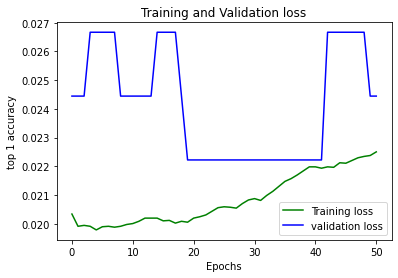

In [9]:
plt.plot(X, train_accu1, 'g', label='Training loss')
plt.plot(X, val_accu1, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('top 1 accuracy')
plt.legend()
plt.savefig('top1 accuracy.png')
plt.show()

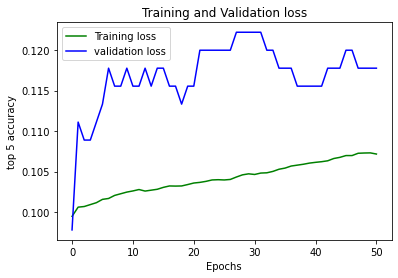

In [10]:
plt.plot(X, train_accu5, 'g', label='Training loss')
plt.plot(X, val_accu5, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('top 5 accuracy')
plt.legend()
plt.savefig('top5 accuracy.png')
plt.show()

# GBDT

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [9]:
# grandient boost decision tree
gbdt_fit = GradientBoostingClassifier(n_estimators=3, learning_rate=1.0, max_depth=3, random_state=0,
                                      min_samples_leaf=500000)

# train model
gbdt_fit.fit(Xtrain, Ytrain)

GradientBoostingClassifier(learning_rate=1.0, min_samples_leaf=500000,
                           n_estimators=3, random_state=0)

In [10]:
# dump model
joblib.dump(gbdt_fit, './modules/gbdt_model.sk')

['./modules/gbdt_model.sk']

In [ ]:
# load model
#gbdt_fit = joblib.load('./modules/gbdt_model.sk')

In [16]:
# predict train
gbdt_val_pred = gbdt_fit.predict(Xval)

# predict test
gbdt_test_pred = gbdt_fit.predict(Xtest)

In [19]:
c = 0
n = gbdt_val_pred.shape[0]
for i in range(n):
    if gbdt_val_pred[i] == Yval[i]:
        c += 1
c / n

0.02

In [20]:
c = 0
n = gbdt_test_pred.shape[0]
for i in range(n):
    if gbdt_test_pred[i] == Ytest[i]:
        c += 1
c / n

0.02

# random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# random forest decision tree
random_fit = RandomForestClassifier(n_estimators=3, max_depth=10, min_samples_leaf=1000, random_state=0)

# train model
random_fit.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=10, min_samples_leaf=1000, n_estimators=3,
                       random_state=0)

In [21]:
# dump model
joblib.dump(gbdt_fit, './modules/random_model.sk')

['./modules/random_model.sk']

In [ ]:
# load model
#random_fit = joblib.load('./modules/random_model.sk')

In [22]:
# predict train
random_val_pred = random_fit.predict(Xval)

# predict test
random_test_pred = random_fit.predict(Xtest)

In [23]:
c = 0
n = random_val_pred.shape[0]
for i in range(n):
    if random_val_pred[i] == Yval[i]:
        c += 1
c / n

0.03333333333333333

In [24]:
c = 0
n = random_test_pred.shape[0]
for i in range(n):
    if random_test_pred[i] == Ytest[i]:
        c += 1
c / n

0.04666666666666667

# try

In [ ]:
#32831, 47018

In [4]:
x = np.ones([4, 5])
np.matmul(np.ones(4), x)

array([4., 4., 4., 4., 4.])

In [13]:
x = np.ones([5, 5])
y = np.array([1, 2, 3, 4, 5]).T
x.T * y, y * x

(array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]),
 array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]))

In [12]:
y

array([1, 2, 3, 4, 5])

In [24]:
class Perceptron:
    def __init__(self, n_inputs, activ_func='Sign', save_fig=False):
        self.weights = np.array([0.0] * (n_inputs + 1)) # 1 more for bias
        self.__save_fig = save_fig
        #self.__activation = ActivationFunction(activ_func)
        
    @property
    def weight(self):
        return self.weights[:]

In [25]:
p = Perceptron(5)

In [26]:
p.weight

array([0., 0., 0., 0., 0., 0.])

In [4]:
x = np.random.rand(5, 5)
x

array([[0.4312073 , 0.79563335, 0.7903964 , 0.44791607, 0.97743261],
       [0.19974816, 0.47477725, 0.23096726, 0.31079405, 0.12462861],
       [0.65393639, 0.70778974, 0.82724055, 0.1705234 , 0.76576441],
       [0.1714608 , 0.6969142 , 0.53680819, 0.25848411, 0.22410697],
       [0.94678149, 0.24725074, 0.92050283, 0.18422513, 0.4689876 ]])

In [10]:
x + np.ones([1, 5])

array([[1.4312073 , 1.79563335, 1.7903964 , 1.44791607, 1.97743261],
       [1.19974816, 1.47477725, 1.23096726, 1.31079405, 1.12462861],
       [1.65393639, 1.70778974, 1.82724055, 1.1705234 , 1.76576441],
       [1.1714608 , 1.6969142 , 1.53680819, 1.25848411, 1.22410697],
       [1.94678149, 1.24725074, 1.92050283, 1.18422513, 1.4689876 ]])

In [9]:
np.ones([1, 5])

array([[1., 1., 1., 1., 1.]])

In [42]:
np.argsort(np.random.rand(4, 5), axis=1)

array([[3, 4, 1, 2, 0],
       [1, 2, 4, 0, 3],
       [3, 0, 2, 4, 1],
       [4, 2, 1, 0, 3]], dtype=int64)

In [43]:
5 in np.array([3, 5])

True